In [25]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score 
from sklearn.model_selection import train_test_split
import time

In [26]:
dm=np.load('wpac_2015-16.npy')
df=pd.read_csv('wpac_2015-16.csv')

In [27]:
data=np.array(dm[:,63:138,63:138,0:])

In [28]:
X = data
y = df['Vmax'].values[:]

X[np.isnan(X)] = 0
X[X > 1000] = 0

In [29]:
X.shape, y.shape

((2953, 75, 75, 2), (2953,))

In [30]:
model = tf.keras.models.load_model('TCINET.h5')

In [31]:
y_pred=model.predict(X)
y_true=y

93/93 [==============================] - 1s 7ms/step


In [32]:
y_pred.shape, y_true.shape

((2953, 1), (2953,))

In [33]:
y_pred=y_pred.squeeze()

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 101.62130629528163
Root Mean Squared Error (RMSE): 10.080739372450893
Mean Absolute Error (MAE): 7.75451352157877
R-squared (R2) Score: 0.909405845544422


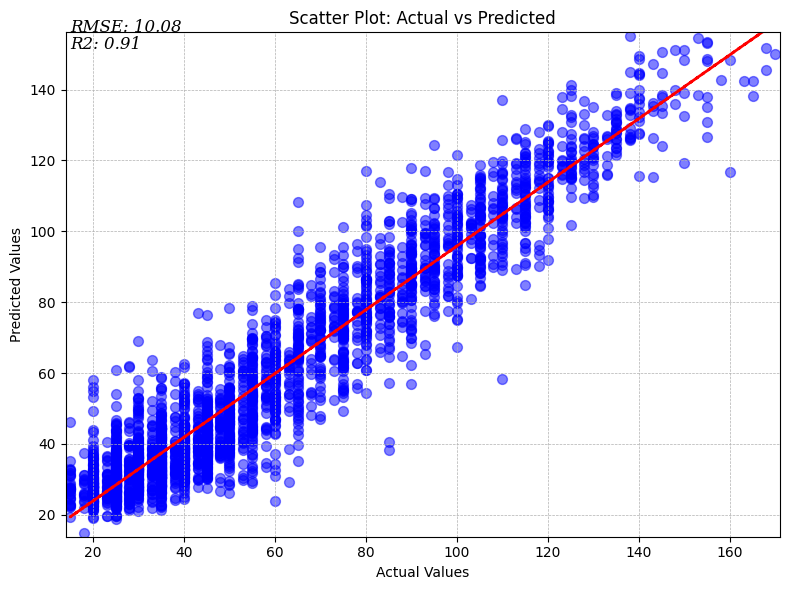

In [35]:



from matplotlib.font_manager import FontProperties

# Assuming you have the values for y_true, y_pred, r2, and rmse

# Set the size of the figure and the marker size for scatter plot
plt.figure(figsize=(8, 6))
marker_size = 50

# Create a scatter plot with transparent points
plt.scatter(y_true, y_pred, color='blue', alpha=0.5, s=marker_size)

# Add a trendline
z = np.polyfit(y_true, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_true, p(y_true), color='red', linestyle='--', linewidth=2)

# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Actual vs Predicted')

# Customize the axes limits
plt.xlim(min(y_true) - 1, max(y_true) + 1)
plt.ylim(min(y_pred) - 1, max(y_pred) + 1)

# Customize the grid
plt.grid(linestyle='--', linewidth=0.5)

# Customize the tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add labels for R2 and RMSE inside the plot
font = FontProperties()
font.set_family('serif')
font.set_style('italic')
font.set_size(12)
plt.text(np.min(y_true), np.max(y_pred), f'R2: {r2:.2f}', fontsize=12, ha='left', va='top', fontproperties=font, color='black')
plt.text(np.min(y_true), np.max(y_pred), f'RMSE: {rmse:.2f}', fontsize=12, ha='left', va='bottom', fontproperties=font, color='black')

# Show the plot
plt.tight_layout()
plt.show()


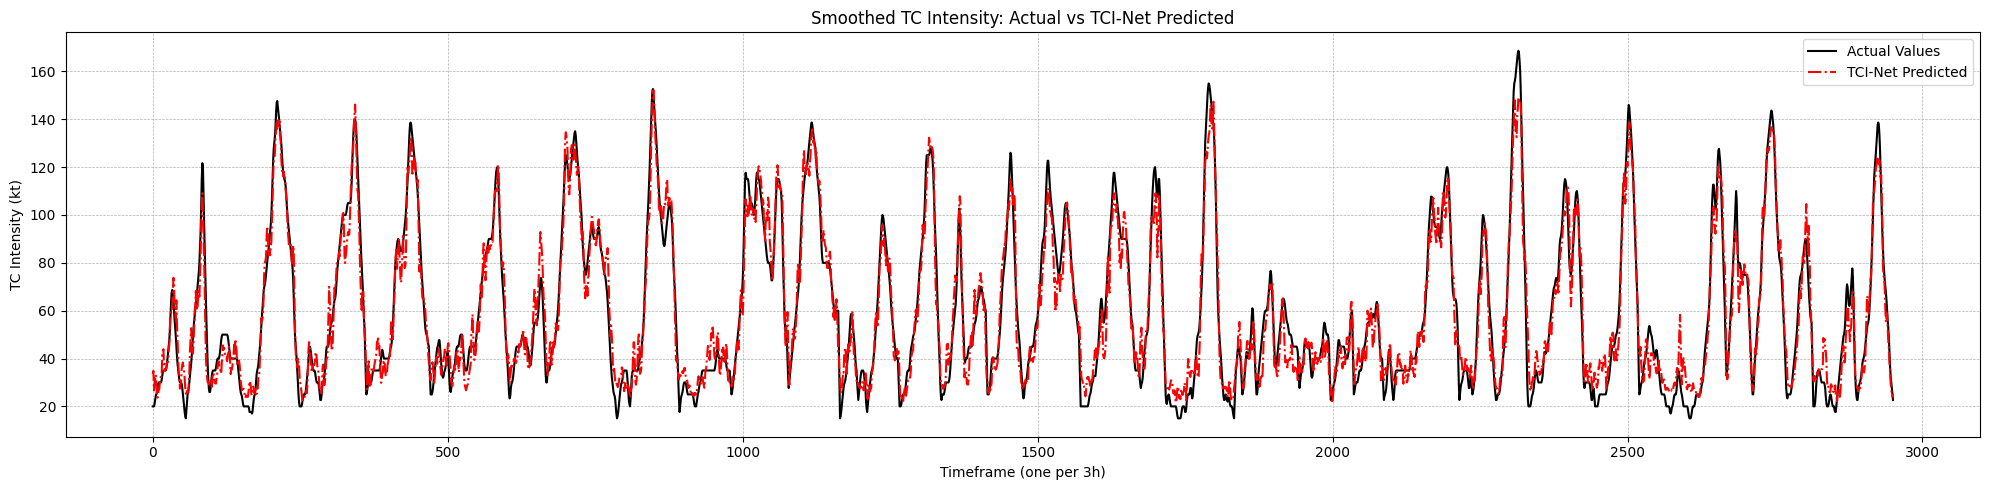

In [36]:
window_size = 3


# Convert input lists to one-dimensional numpy arrays
y_true = np.ravel(y_true)
y_pred = np.ravel(y_pred)

# Apply the moving average to the data
y_true_smooth = np.convolve(y_true, np.ones(window_size)/window_size, mode='valid')
y_pred_smooth = np.convolve(y_pred, np.ones(window_size)/window_size, mode='valid')

plt.figure(figsize=(20, 5))
plt.plot(y_true_smooth, label='Actual Values', color="black")
plt.plot(y_pred_smooth, label='TCI-Net Predicted', color="red", linestyle='dashdot')

# Set labels and title
plt.xlabel('Timeframe (one per 3h)')
plt.ylabel('TC Intensity (kt)')
plt.title('Smoothed TC Intensity: Actual vs TCI-Net Predicted')

# Customize the grid
plt.grid(linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()